In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec
import standard

In [2]:
# Example data from SPRAT
# BLAP-14
sprat_data = fits.open('examples/v_e_20180704_32_1_0_2.fits')[0].data


aspired/twodspec.py:103: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


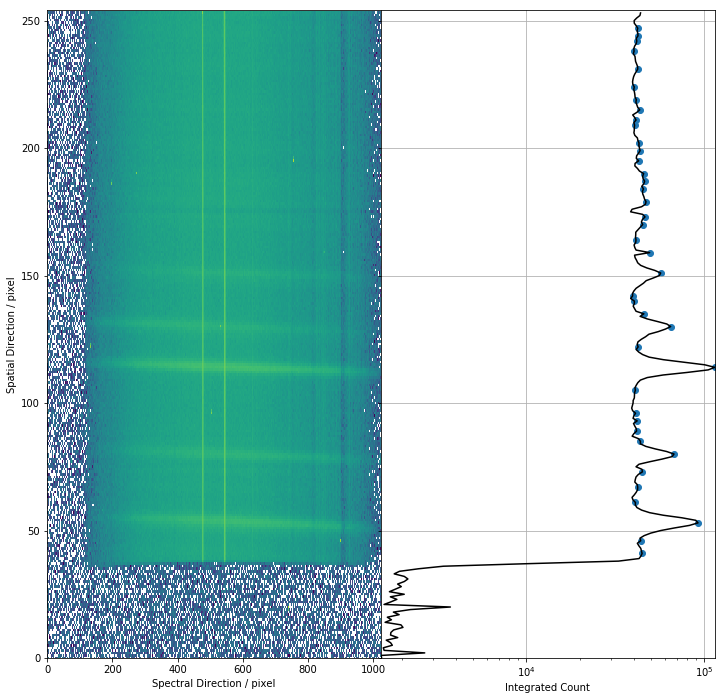

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

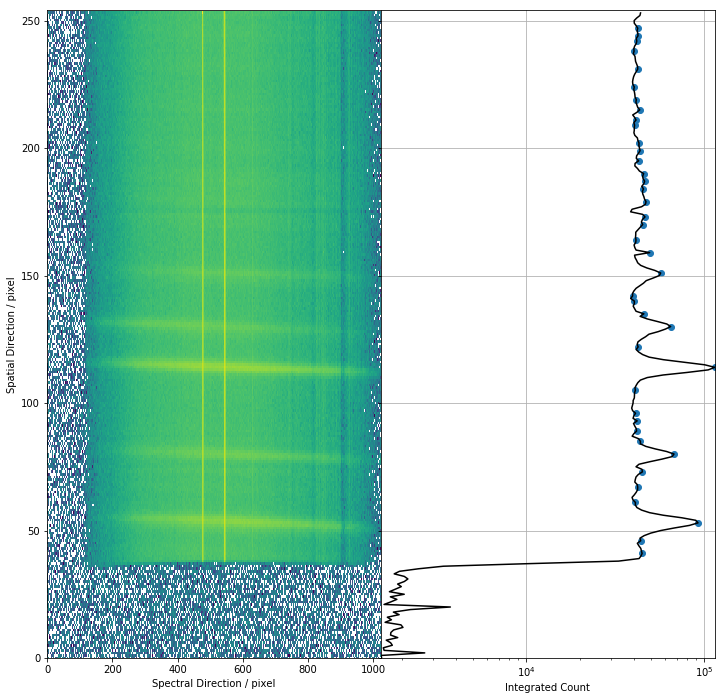

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:331: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [1.65976832 1.61241025 1.57036354 1.53961091 1.56590996 1.55228673
 1.52125858 1.49448863 1.51033411 1.43957594 1.40439294 1.41295747
 1.4218957  1.35680027 1.3740618  1.39576205 1.37863175 1.37729335
 1.31074096 0.        ] pixels
Spectrum 2 : Trace gaussian width = [2.19712787 2.02006392 1.68856085 1.7348216  1.69326891 1.67485637
 1.66824778 1.64998257 1.67915649 1.63739311 1.63519378 1.63446235
 1.59381876 1.58474163 1.57606262 1.57439575 1.53431033 1.58393599
 1.54178206 0.        ] pixels
Spectrum 3 : Trace gaussian width = [2.17664272 1.94112622 1.48965375 1.75002227 1.66540407 1.70652374
 1.61281371 1.62886349 1.55350214 1.48081835 1.48187317 1.46481954
 1.40334612 1.36792274 1.37864507 1.39670949 1.38898981 1.38433746
 1.67533708 0.        ] pixels
Spectrum 4 : Trace gaussian width = [2.24153816 1.59188552 1.63286585 1.48312824 1.48164132 1.55679384
 1.63945548 1.6709127  1.74262765 1.81810149 1.74704629 1.67791866
 1.71929808 1.71804285 1.7

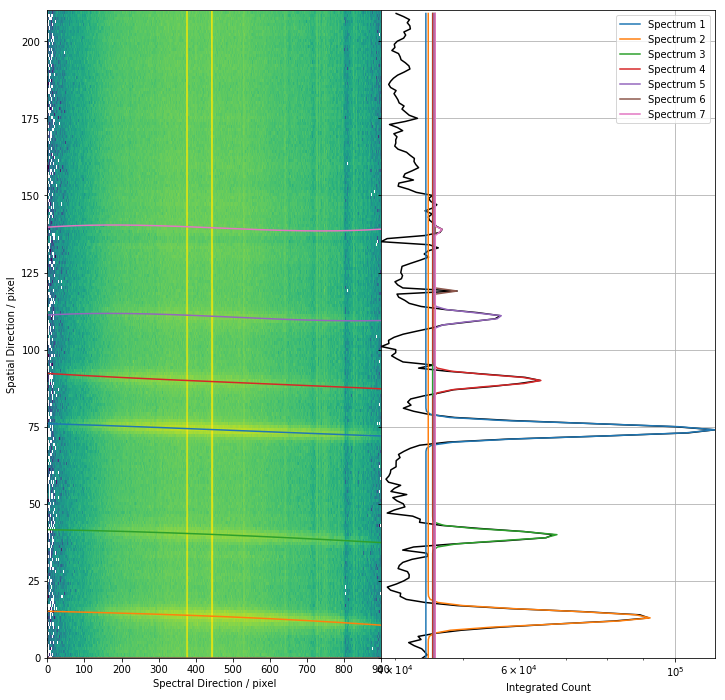

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.


spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, my_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), 
                                fittype='spline', bigbox=8, Saxis=1,
                                silence=False, display=True)

aspired/twodspec.py:673: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(img[0])), :]),


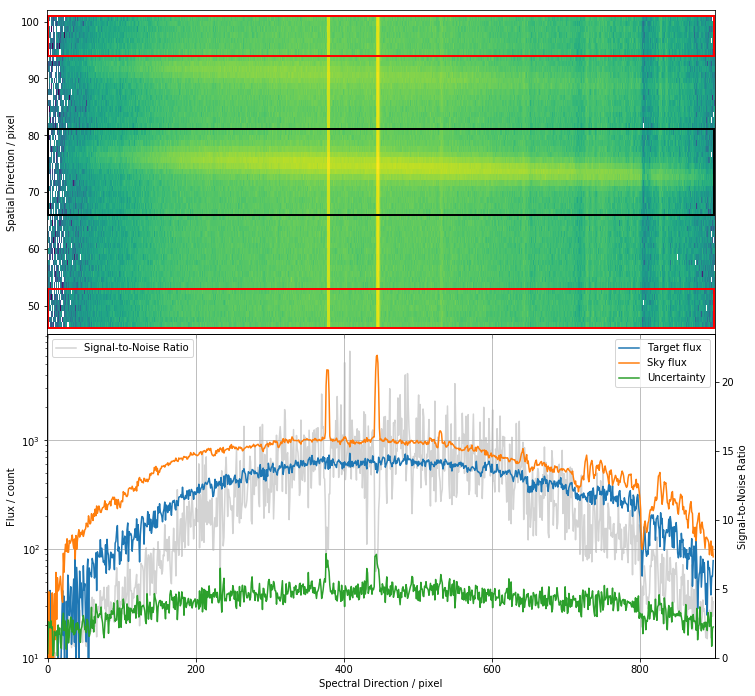

In [6]:
# (4a) (Aperature) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True,
    optimal=False)

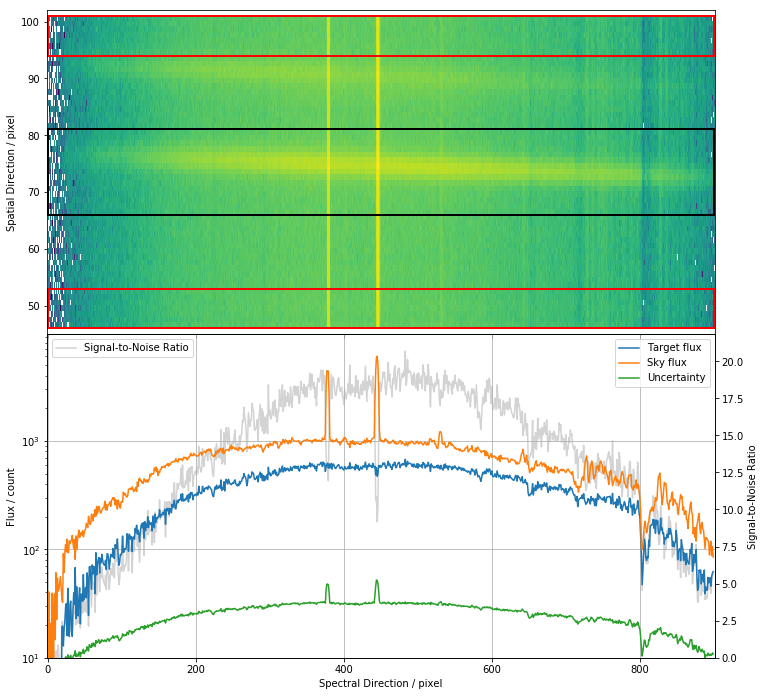

In [7]:
# (4b) (Optimal) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True)

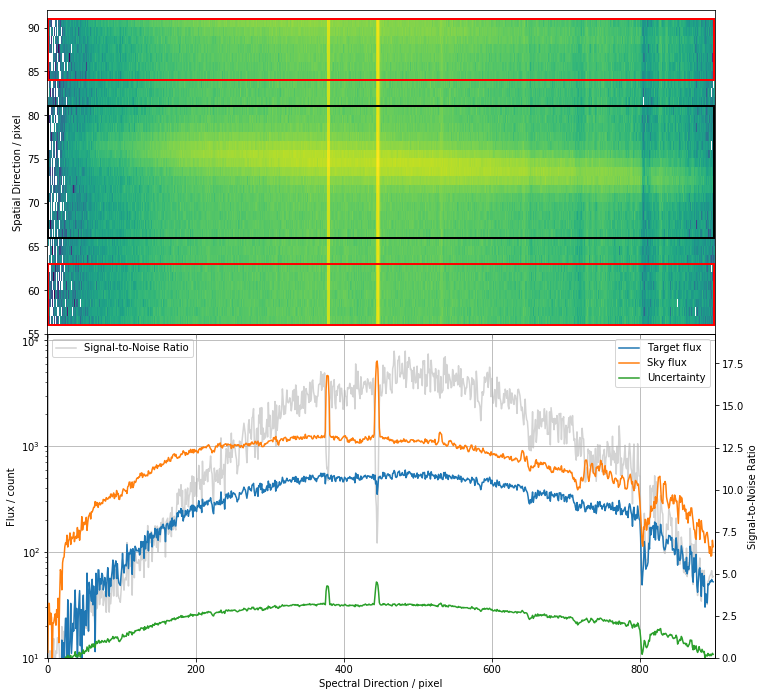

In [8]:
# Optimal my[0] with sky fit with 1st order polynomial
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skydeg=1,
    display=True)

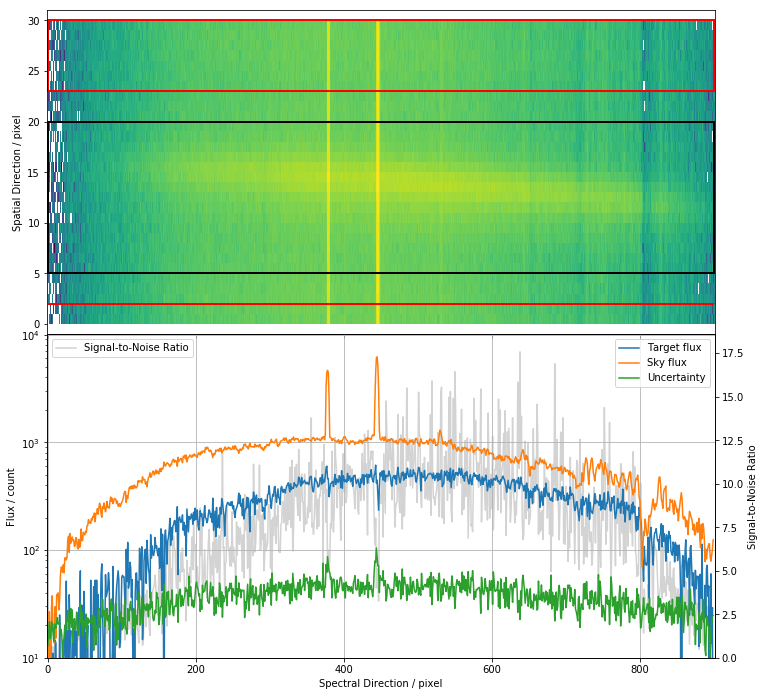

In [9]:
# my[1] is a special case where the spectrum (sky part) is close to the edge
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    trace_sigma = my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

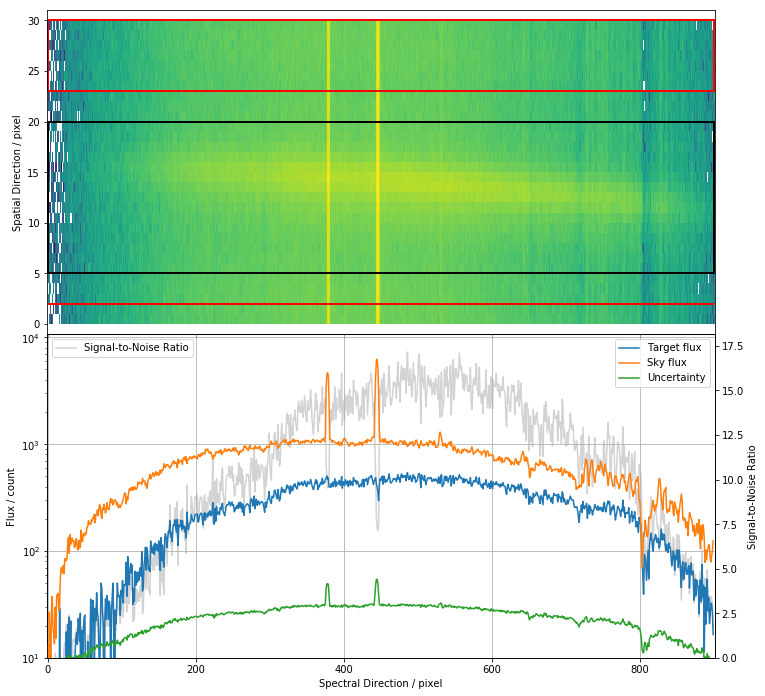

In [10]:
# Optimal my[1]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    trace_sigma = my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

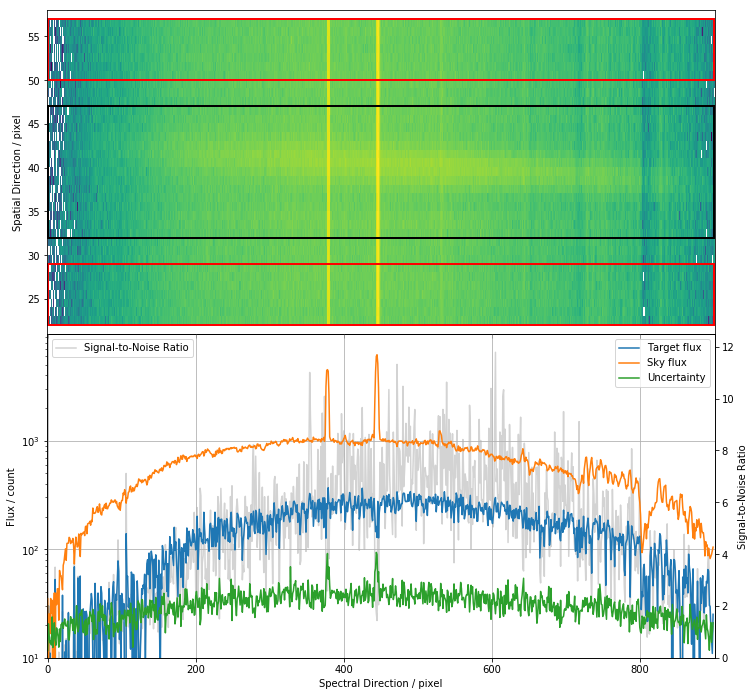

In [11]:
# my[2] is a typical case
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    trace_sigma = my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

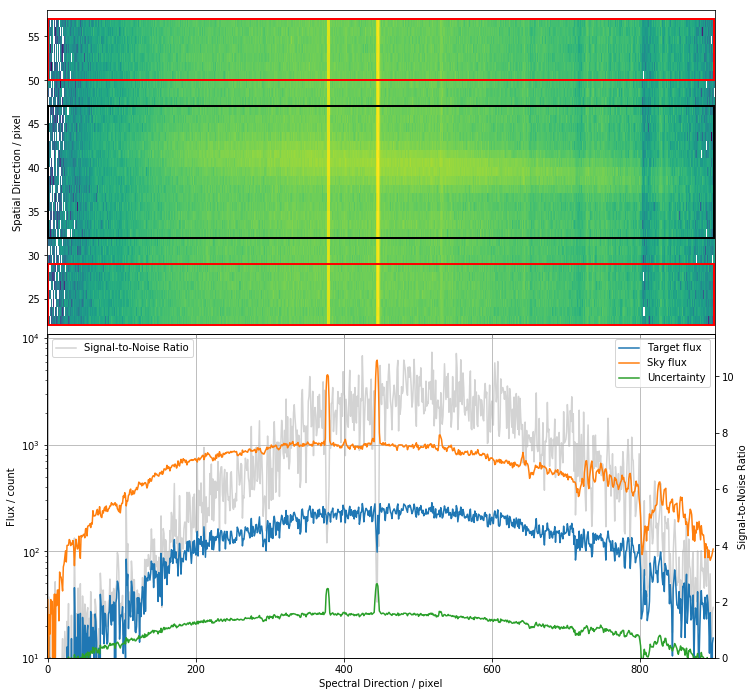

In [12]:
# Optimal my[2]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    trace_sigma = my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

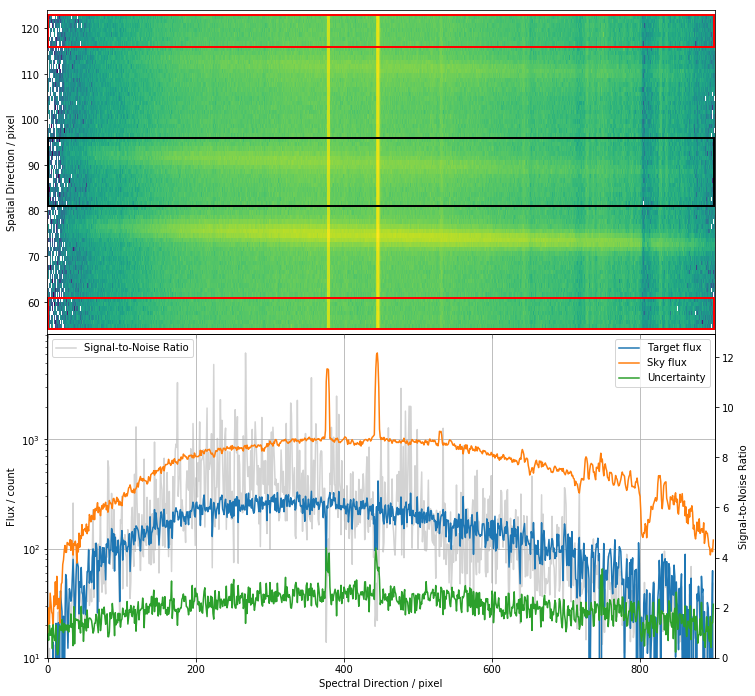

In [13]:
# my[3] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[3],
    trace_sigma = my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True,
    optimal=False)

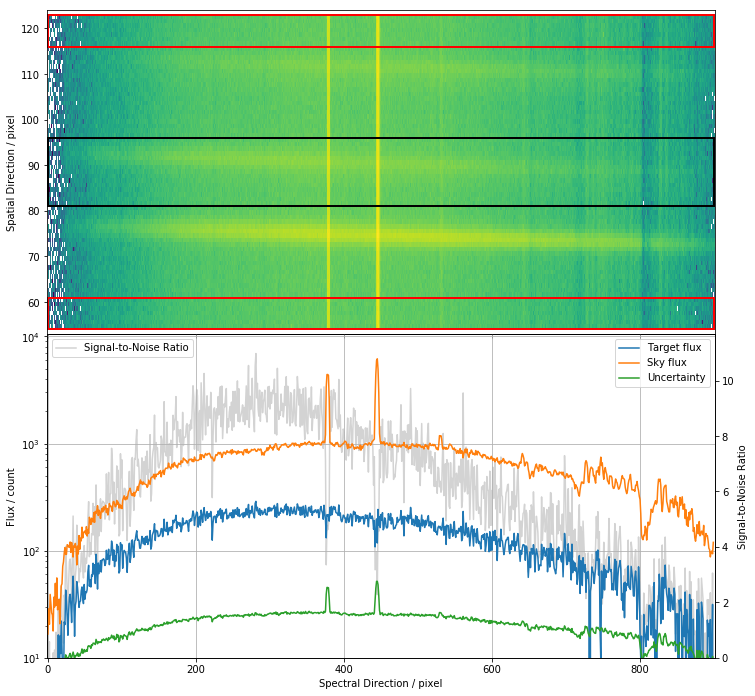

In [14]:
# Optimal my[3]
spec0, sky0, err0 = twodspec.ap_extract(
    sprat_data,
    my[3],
    trace_sigma = my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True)

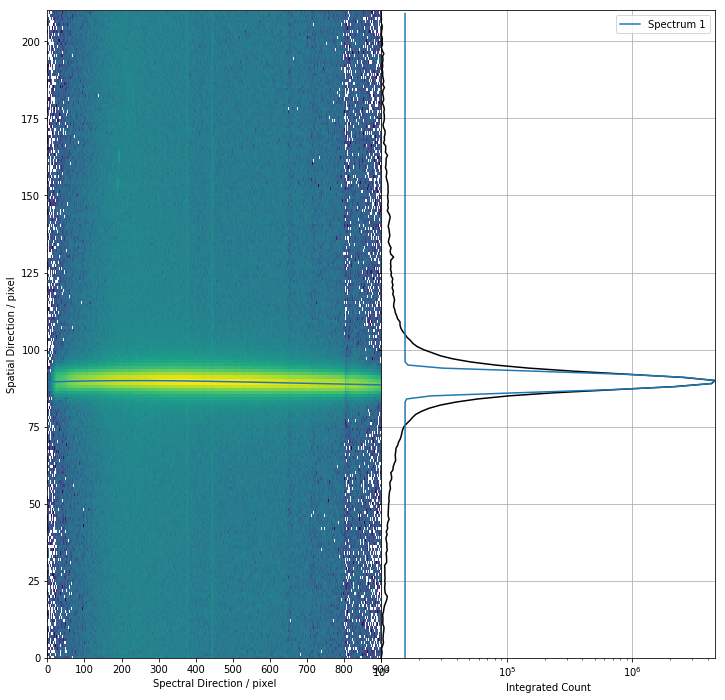

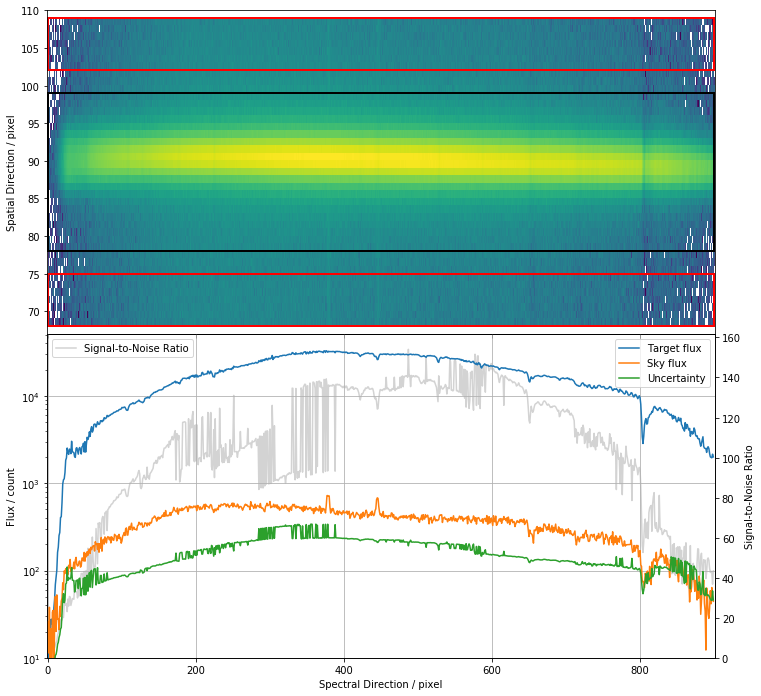

In [15]:
# Example data from SPRAT
# Hiltner102
sprat_standard_data = fits.open('examples/v_s_20180703_65_1_0_2.fits')[0].data

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_standard_data)[Waxis]
spatial_size = np.shape(sprat_standard_data)[Saxis]

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, my_sigma = twodspec.ap_trace(
    sprat_standard_data, nsteps=20, Saxis=1, spatial_mask=spatial_mask,
    spec_mask=spec_mask, cosmic=True, n_spec=1, recenter=False, prevtrace=(0, ), 
    fittype='spline', bigbox=8, silence=True, display=True
)

spec, sky, err = twodspec.ap_extract(
    sprat_standard_data,
    my[0],
    apwidth=10,
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

In [16]:
# Wavelength Calibration placeholder
wave = np.arange(len(spec))*4.45+4000.
#wave = np.arange(4020.,8000.,9.2)

/usr/local/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:135: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coeffs, _, _, _ = lstsq(A, y)
/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
aspired/standard.py:444: RuntimeWarning: invalid value encountered in true_divide
  sensitivity = flux_std / flux_obs


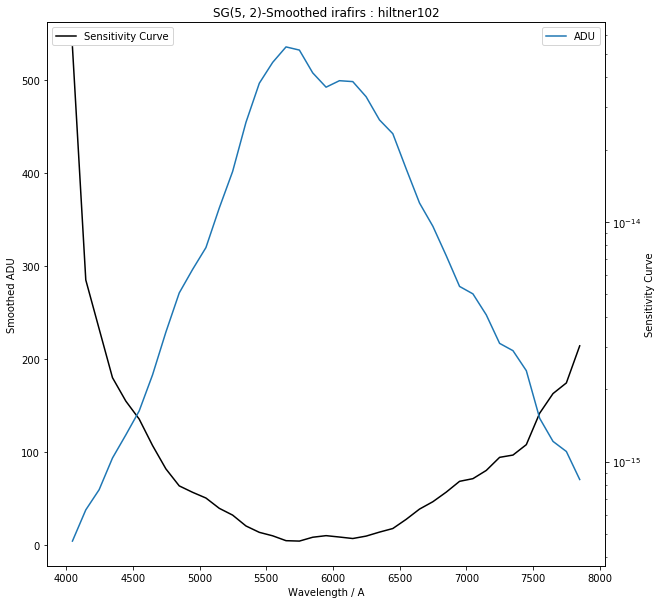

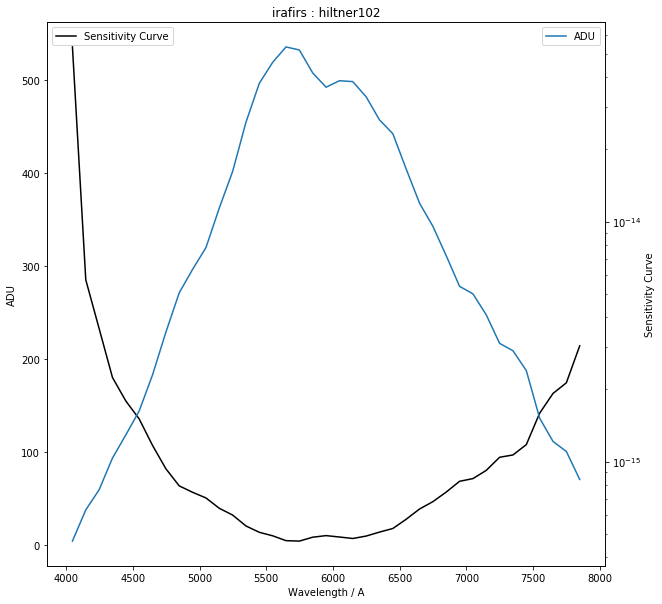

In [17]:
# Get standard
sencurve = standard.get_sencurve(wave, spec, 'hiltner102' ,'irafirs', exp_time=60., cutoff=0.4, smooth=True, slength=5, sorder=2, display=True)
sencurve_not_smoothed = standard.get_sencurve(wave, spec, 'hiltner102' ,'irafirs', exp_time=60., cutoff=0.4, smooth=False, display=True)

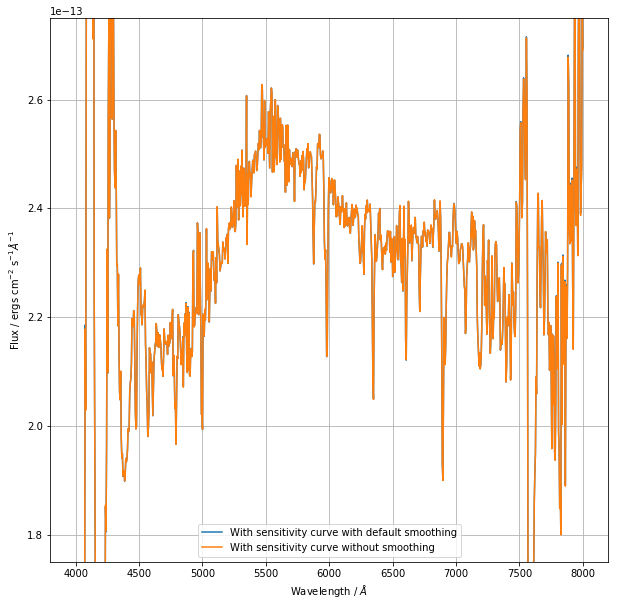

In [18]:
plt.figure(figsize=(10,10))
plt.plot(wave, spec * sencurve(wave) / 60., label='With sensitivity curve with default smoothing')
plt.plot(wave, spec * sencurve_not_smoothed(wave) / 60., label='With sensitivity curve without smoothing')
plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(1.75e-13, 2.75e-13)
plt.grid()
plt.legend()

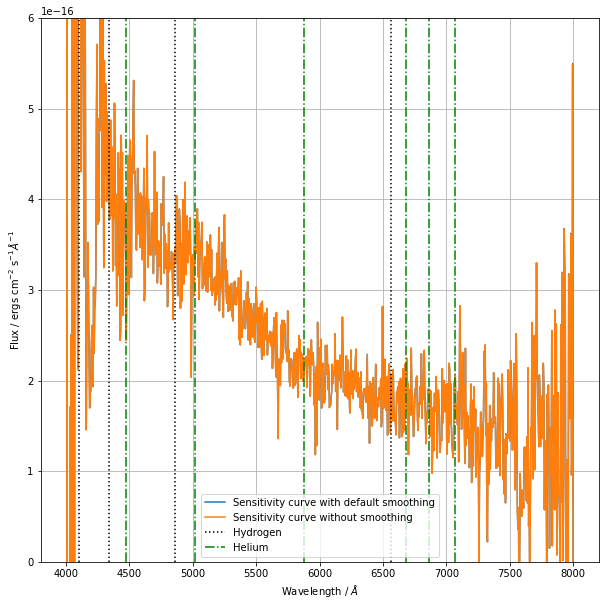

In [19]:
# Flux calibrated BLAP-09
plt.figure(figsize=(10,10))
plt.plot(wave, spec0 * sencurve(wave) / 450., label='Sensitivity curve with default smoothing')
plt.plot(wave, spec0 * sencurve_not_smoothed(wave) / 450., label='Sensitivity curve without smoothing')

# Hydrogen
Ha = 6563.
Hb = 4861.
Hc = 4340.
Hd = 4102

# Helium
He1 = 4471
He2 = 5015
He3 = 5875
He4 = 6678
He5 = 6867
He6 = 7065

plt.plot([Ha,Ha],[0,1e-15], ls=':', color='black', label='Hydrogen')
plt.plot([Hb,Hb],[0,1e-15], ls=':', color='black')
plt.plot([Hc,Hc],[0,1e-15], ls=':', color='black')
plt.plot([Hd,Hd],[0,1e-15], ls=':', color='black')

plt.plot([He1,He1],[0,1e-15], ls='-.', color='green', label='Helium')
plt.plot([He2,He2],[0,1e-15], ls='-.', color='green')
plt.plot([He3,He3],[0,1e-15], ls='-.', color='green')
plt.plot([He4,He4],[0,1e-15], ls='-.', color='green')
plt.plot([He5,He5],[0,1e-15], ls='-.', color='green')
plt.plot([He6,He6],[0,1e-15], ls='-.', color='green')

plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(0, 6e-16)
plt.grid()
plt.legend()


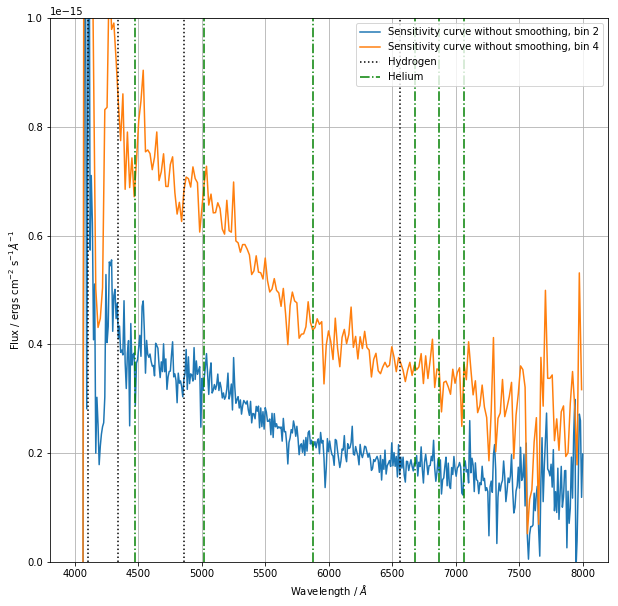

In [20]:

bin1 = (spec0 * sencurve_not_smoothed(wave) / 450.)
bin2 = (bin1[:-1:2] + bin1[1::2]) / 2.
bin4 = (bin2[::2] + bin2[1::2])

plt.figure(figsize=(10,10))
plt.plot(wave[1::2], bin2, label='Sensitivity curve without smoothing, bin 2')
plt.plot(wave[1::4], bin4, label='Sensitivity curve without smoothing, bin 4')


plt.plot([Ha,Ha],[0,1e-15], ls=':', color='black', label='Hydrogen')
plt.plot([Hb,Hb],[0,1e-15], ls=':', color='black')
plt.plot([Hc,Hc],[0,1e-15], ls=':', color='black')
plt.plot([Hd,Hd],[0,1e-15], ls=':', color='black')

plt.plot([He1,He1],[0,1e-15], ls='-.', color='green', label='Helium')
plt.plot([He2,He2],[0,1e-15], ls='-.', color='green')
plt.plot([He3,He3],[0,1e-15], ls='-.', color='green')
plt.plot([He4,He4],[0,1e-15], ls='-.', color='green')
plt.plot([He5,He5],[0,1e-15], ls='-.', color='green')
plt.plot([He6,He6],[0,1e-15], ls='-.', color='green')

plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(0, 1e-15)
plt.grid()
plt.legend()